In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5 MB 34 kB/s 
     |████████████████████████████████| 4.3 MB 41.2 MB/s 
     |████████████████████████████████| 501 kB 53.1 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 


In [2]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 37.28 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img_width=64
img_height=64

In [5]:
datagen=ImageDataGenerator(rescale=1/255.,validation_split=0.2)

In [6]:
train_data_generator=datagen.flow_from_directory('/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width,img_height),class_mode='binary',batch_size=16,subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
validation_data_generator=datagen.flow_from_directory('/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width,img_height),
                                                 class_mode='binary',batch_size=16,subset='validation')

Found 5510 images belonging to 2 classes.


In [8]:
train_data_generator.labels,validation_data_generator.labels

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32))

In [9]:
## Building the CNN model 

In [10]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model_history=model.fit_generator(train_data_generator,
                                  validation_data=validation_data_generator,
                                  steps_per_epoch=len(train_data_generator),
                                  epochs=5,validation_steps=len(validation_data_generator)
                                  )

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 173s 126ms/step - loss: 0.5004 - accuracy: 0.7594 - val_loss: 0.3351 - val_accuracy: 0.8737
Epoch 2/5
1378/1378 [==============================] - 171s 124ms/step - loss: 0.2700 - accuracy: 0.9211 - val_loss: 0.2554 - val_accuracy: 0.9194
Epoch 3/5
1378/1378 [==============================] - 169s 123ms/step - loss: 0.2244 - accuracy: 0.9352 - val_loss: 0.2171 - val_accuracy: 0.9334
Epoch 4/5
1378/1378 [==============================] - 172s 125ms/step - loss: 0.1968 - accuracy: 0.9352 - val_loss: 0.1854 - val_accuracy: 0.9343
Epoch 5/5
1378/1378 [==============================] - 169s 123ms/step - loss: 0.1807 - accuracy: 0.9362 - val_loss: 0.1822 - val_accuracy: 0.9339


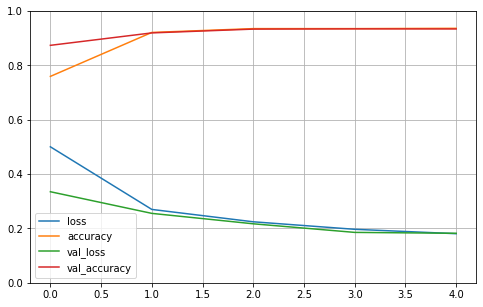

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()